Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  7.79it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 50/50 [00:02<00:00, 17.03it/s]


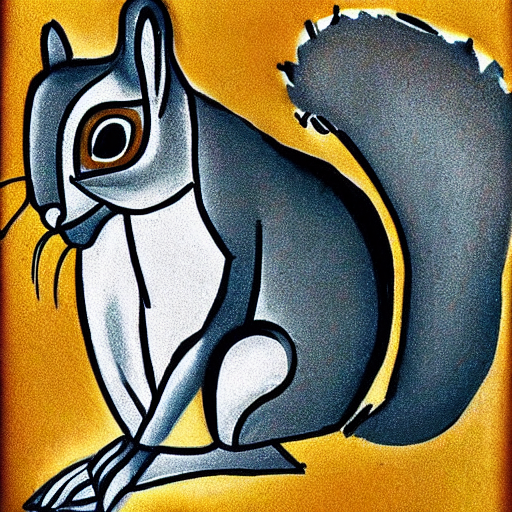

In [4]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline("An image of a squirrel in Picasso style").images[0]

hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 256, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 256, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 256, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_states torch.Size([1, 512, 16, 16])
res_hidden_states torch.Size([1, 512, 16, 16])
hidden_sta

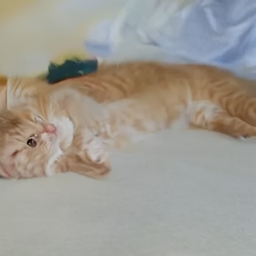

In [2]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")
scheduler.set_timesteps(50)

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image

In [3]:
from diffusers.models.unets.unet_2d import UNet2DModel

model = UNet2DModel(
    in_channels=1,
    out_channels=1,
)

In [6]:
random_input = torch.randn((3, 1, 256, 256))

output = model(random_input,timestep=0)


hidden_states torch.Size([1, 896, 32, 32])
res_hidden_states torch.Size([1, 896, 32, 32])
hidden_states torch.Size([1, 896, 32, 32])
res_hidden_states torch.Size([1, 896, 32, 32])
hidden_states torch.Size([1, 896, 32, 32])
res_hidden_states torch.Size([1, 672, 32, 32])
hidden_states torch.Size([1, 896, 64, 64])
res_hidden_states torch.Size([1, 672, 64, 64])
hidden_states torch.Size([1, 672, 64, 64])
res_hidden_states torch.Size([1, 672, 64, 64])
hidden_states torch.Size([1, 672, 64, 64])
res_hidden_states torch.Size([1, 448, 64, 64])
hidden_states torch.Size([1, 672, 128, 128])
res_hidden_states torch.Size([1, 448, 128, 128])
hidden_states torch.Size([1, 448, 128, 128])
res_hidden_states torch.Size([1, 448, 128, 128])
hidden_states torch.Size([1, 448, 128, 128])
res_hidden_states torch.Size([1, 224, 128, 128])


In [8]:
import skimage

output.sample

tensor([[[[-4.7895e-02, -8.7313e-04,  1.5142e-01,  ...,  4.1625e-01,
            2.7687e-01, -3.1972e-02],
          [ 2.9248e-01,  2.4124e-01,  1.5626e-01,  ...,  4.7333e-01,
            8.0135e-01,  2.7955e-01],
          [ 4.6244e-02,  3.1210e-01,  3.9190e-01,  ...,  1.1762e-01,
            1.1501e+00,  7.2373e-01],
          ...,
          [ 1.8889e-01,  2.9332e-01,  5.0717e-01,  ...,  2.6650e-01,
            1.8116e-01,  1.0382e-01],
          [-1.1074e-02,  5.0238e-01,  4.9782e-01,  ...,  5.2798e-01,
            5.0446e-01,  1.2995e-01],
          [-3.3341e-02,  1.8068e-02,  1.5766e-01,  ...,  1.2659e-01,
            3.1106e-01,  4.9419e-02]]]], grad_fn=<ConvolutionBackward0>)